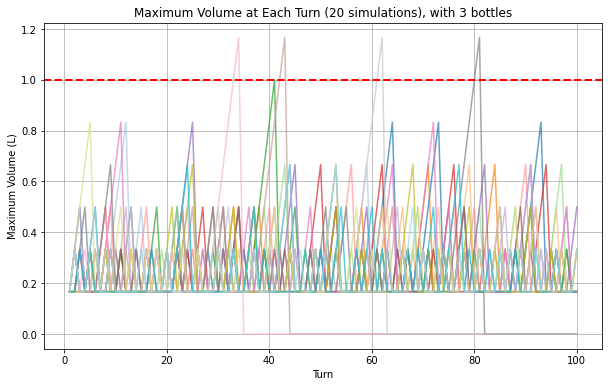

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def distribute_water_evenly(bottles, water=0.5):
    """A's strategy: Distribute water evenly across all bottles."""
    num_bottles = len(bottles)
    for i in range(num_bottles):
        bottles[i] += water / num_bottles
    
    return bottles

def empty_two_adjacent_random(bottles):
    """B's strategy: Empty two adjacent bottles randomly"""
    num_bottles = len(bottles)
    
    # Choose a random bottle index
    index = np.random.randint(num_bottles)
    
    # Empty the chosen bottle and its adjacent bottle
    bottles[index] = 0
    bottles[(index + 1) % num_bottles] = 0
    
    return bottles

def simulate_game(num_simulations, num_bottles, num_turns):
    """Monte Carlo simulation of the game"""
    max_volumes = np.zeros((num_simulations, num_turns))
    wins_at_turn = np.zeros((num_simulations, num_turns))
    
    for sim in range(num_simulations):
        bottles = np.zeros(num_bottles)
        
        for turn in range(num_turns):
            bottles = distribute_water_evenly(bottles.copy())
            bottles = empty_two_adjacent_random(bottles.copy())
            
            max_volumes[sim, turn] = max(bottles)
            
            if max(bottles) > 1:
                wins_at_turn[sim, turn:] = 1  # Record win for all remaining turns
                break

    return max_volumes

# Define parameters for simulation
num_simulations = 20
num_turns = 100
num_bottles = 3

# Run the simulation
max_volumes = simulate_game(num_simulations,num_bottles,num_turns)



# Plot the graphs
plt.figure(figsize=(10, 6))
# Assign different colors for each simulation using the 'tab20' colormap
colors = plt.cm.tab20(np.linspace(0, 1, num_simulations))

for sim, color in zip(range(len(max_volumes)), colors):
    plt.plot(range(1, len(max_volumes[sim]) + 1), max_volumes[sim], color=color, alpha=0.7)

#plotting horizontal line to show point of overfilling cup
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="overfilling volume")


#labels and legend
plt.xlabel('Turn')
plt.ylabel('Maximum Volume (L)')
plt.title('Maximum Volume at Each Turn (20 simulations), with 3 bottles')
plt.grid(True)
plt.show()


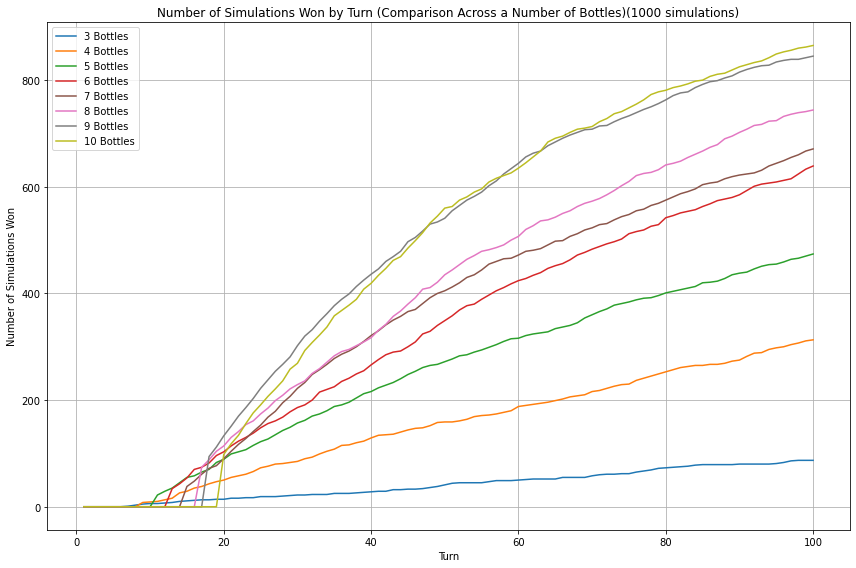

In [2]:
def simulate_game(num_simulations, num_bottles, num_turns):
    """Monte Carlo simulation of the game."""
    wins_at_turn = np.zeros((num_simulations, num_turns))
    
    for sim in range(num_simulations):
        bottles = np.zeros(num_bottles)
        for turn in range(num_turns):
            bottles = distribute_water_evenly(bottles.copy())
            bottles = empty_two_adjacent_random(bottles.copy())
            if max(bottles) > 1:
                wins_at_turn[sim, turn:] = 1  # Record win for all remaining turns
                break
    
    # Count cumulative wins by turn
    cumulative_wins = np.sum(wins_at_turn, axis=0)
    
    return cumulative_wins

# Define parameters for simulation
num_simulations = 1000
num_turns = 100
num_bottles_range = range(3, 11)

# Run the simulations and collect data
plt.figure(figsize=(12, 8))
for idx, num_bottles in enumerate(num_bottles_range):
    cumulative_wins = simulate_game(num_simulations, num_bottles, num_turns)
    
    # Plot the line chart with different colors
    color = plt.cm.tab10(idx / len(num_bottles_range))  # Assign different color for each number of bottles
    plt.plot(range(1, len(cumulative_wins) + 1), cumulative_wins, label=f'{num_bottles} Bottles', color=color)

plt.xlabel('Turn')
plt.ylabel('Number of Simulations Won')
plt.title('Number of Simulations Won by Turn (Comparison Across a Number of Bottles)(1000 simulations)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

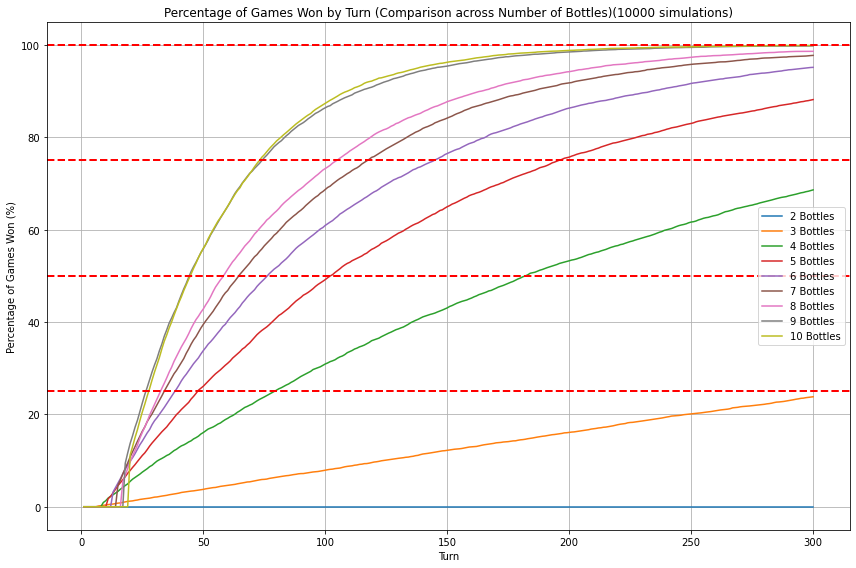

In [3]:
def simulate_game(num_simulations, num_bottles, num_turns):
    """Monte Carlo simulation of the game."""
    wins_at_turn = np.zeros((num_simulations, num_turns))
    
    for sim in range(num_simulations):
        bottles = np.zeros(num_bottles)
        for turn in range(num_turns):
            bottles = distribute_water_evenly(bottles.copy())
            bottles = empty_two_adjacent_random(bottles.copy())
            if max(bottles) > 1:
                wins_at_turn[sim, turn:] = 1  # Record win for all remaining turns
                break
    
    # Count cumulative wins by turn
    cumulative_wins = np.sum(wins_at_turn, axis=0)
    # Calculate percentage of games won on each turn, limiting to 100%
    percentage_wins = (cumulative_wins / num_simulations) * 100
    
    return percentage_wins

# Define parameters for simulation
num_simulations = 10000
num_turns = 300
num_bottles_range = range(2,11)

# Run the simulations and collect data
plt.figure(figsize=(12, 8))
for idx, num_bottles in enumerate(num_bottles_range):
    percentage_wins = simulate_game(num_simulations, num_bottles, num_turns)
    
    # Plot the line chart with different colors
    color = plt.cm.tab10(idx / len(num_bottles_range))  # Assign different color for each number of bottles
    plt.plot(range(1, len(percentage_wins) + 1), percentage_wins, label=f'{num_bottles} Bottles', color=color)

#plotting horizontal lines to show significant percentages
plt.axhline(y=100, color='red', linestyle='--', linewidth=2)
plt.axhline(y=75, color='red', linestyle='--', linewidth=2)
plt.axhline(y=50, color='red', linestyle='--', linewidth=2)
plt.axhline(y=25, color='red', linestyle='--', linewidth=2)

 
plt.xlabel('Turn')
plt.ylabel('Percentage of Games Won (%)')
plt.title('Percentage of Games Won by Turn (Comparison across Number of Bottles)(10000 simulations)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



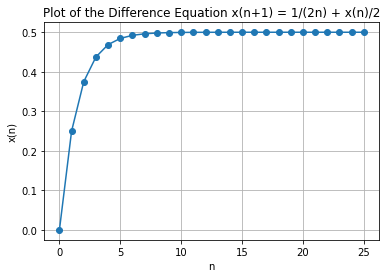

In [4]:
def difference_equation(n_max):
    x = np.zeros(n_max+1)
    x[0] = 0
    for n in range(n_max):
        x[n+1] = 1/(4) + x[n]/2
    return x

n_max = 25
n_values = np.arange(n_max+1)
x_values = difference_equation(n_max)

plt.plot(n_values, x_values, marker='o', linestyle='-')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Plot of the Difference Equation x(n+1) = 1/(2n) + x(n)/2')
plt.grid(True)
plt.show()

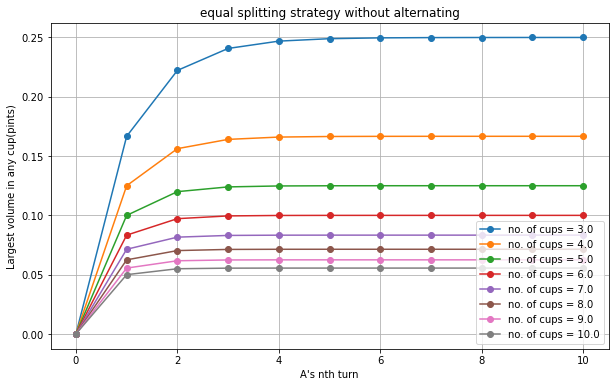

In [5]:
#defining the difference equation we derived
def difference_equation(n_max, N):
    x = np.zeros(n_max+1)
    x[0] = 0
    for n in range(n_max):
        x[n+1] = 1/(2*N) + x[n]/N
    return x

n_max = 10
N_values = np.linspace(3, 10, 8)  # Values of N ranging from 3 to 10
n_values = np.arange(n_max+1)

plt.figure(figsize=(10, 6))
for N in N_values:
    x_values = difference_equation(n_max, N)
    plt.plot(n_values, x_values, marker='o', label=f"no. of cups = {N}")

plt.xlabel("A's nth turn")
plt.ylabel("Largest volume in any cup(pints)")
plt.title("equal splitting strategy without alternating")
plt.grid(True)
plt.legend(loc='lower right') 
plt.show()

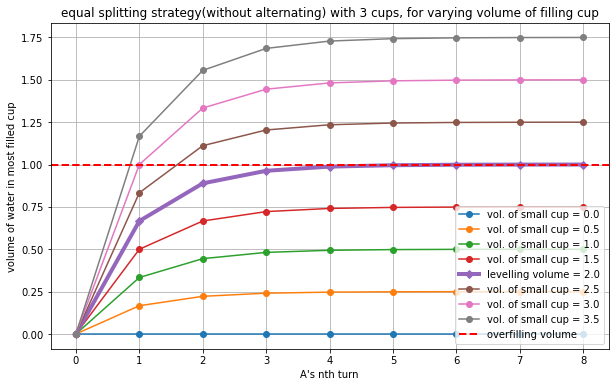

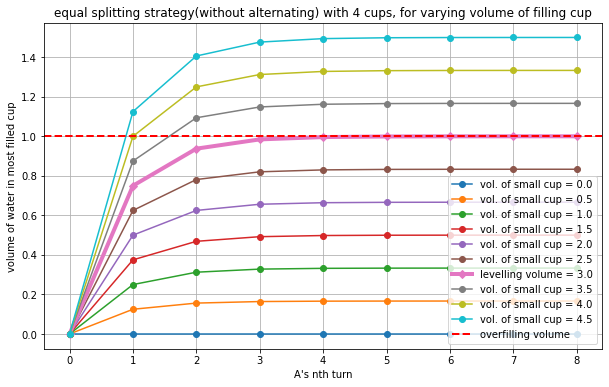

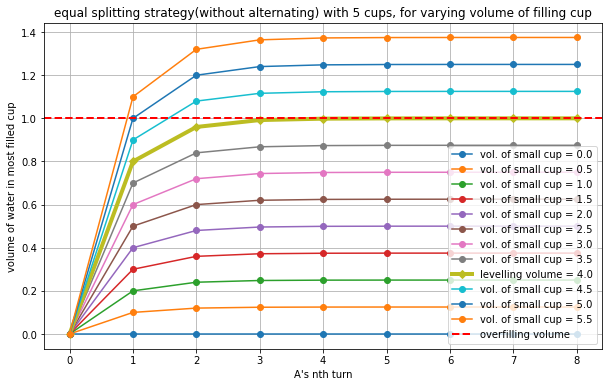

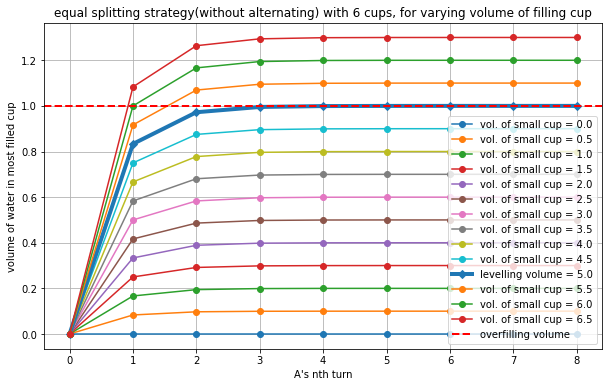

In [6]:
#defining the difference equation we derived
def difference_equation(n_max, N, V):
    x = np.zeros(n_max+1)
    x[0] = 0
    for n in range(n_max):
        x[n+1] = V/(N) + x[n]/N
    return x

#initialising values and arrays
n_max = 8
N_values = np.linspace(3, 10, 8)  # Values of N ranging from 3 to 10
V_values = np.arange(0, 4, 0.5)
n_values = np.arange(n_max+1)



#------- with 3 cups ----------#

plt.figure(figsize=(10, 6))
for V in V_values:
    x_values = difference_equation(n_max, 3, V)
    if V != 2:
        plt.plot(n_values, x_values, marker='o', label=f"vol. of small cup = {V}")
    else:
        plt.plot(n_values, x_values, marker='D',linewidth=4, label=f"levelling volume = {V}")

#plotting horizontal line to show point of overfilling cup
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="overfilling volume")

#labels and legend
plt.xlabel("A's nth turn")
plt.ylabel("volume of water in most filled cup")
plt.title("equal splitting strategy(without alternating) with 3 cups, for varying volume of filling cup")
plt.grid(True)
plt.legend(loc='lower right') 
plt.show()







#------- with 4 cups ----------#

V_values = np.arange(0, 5, 0.5)
plt.figure(figsize=(10, 6))
for V in V_values:
    x_values = difference_equation(n_max, 4, V)
    if V != 3:
        plt.plot(n_values, x_values, marker='o', label=f"vol. of small cup = {V}")
    else:
        plt.plot(n_values, x_values, marker='D',linewidth=4, label=f"levelling volume = {V}")

#plotting horizontal line to show point of overfilling cup
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="overfilling volume")

#labels and legend
plt.xlabel("A's nth turn")
plt.ylabel("volume of water in most filled cup")
plt.title("equal splitting strategy(without alternating) with 4 cups, for varying volume of filling cup")
plt.grid(True)
plt.legend(loc='lower right') 
plt.show()








#------- with 6 cups ----------#

V_values = np.arange(0, 6, 0.5)
plt.figure(figsize=(10, 6))
for V in V_values:
    x_values = difference_equation(n_max, 5, V)
    if V != 4:
        plt.plot(n_values, x_values, marker='o', label=f"vol. of small cup = {V}")
    else:
        plt.plot(n_values, x_values, marker='D',linewidth=4, label=f"levelling volume = {V}")

#plotting horizontal line to show point of overfilling cup
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="overfilling volume")

#labels and legend
plt.xlabel("A's nth turn")
plt.ylabel("volume of water in most filled cup")
plt.title("equal splitting strategy(without alternating) with 5 cups, for varying volume of filling cup")
plt.grid(True)
plt.legend(loc='lower right') 
plt.show()







#------- with 6 cups ----------#

V_values = np.arange(0, 7, 0.5)
plt.figure(figsize=(10, 6))
for V in V_values:
    x_values = difference_equation(n_max, 6, V)
    if V != 5:
        plt.plot(n_values, x_values, marker='o', label=f"vol. of small cup = {V}")
    else:
        plt.plot(n_values, x_values, marker='D',linewidth=4, label=f"levelling volume = {V}")

#plotting horizontal line to show point of overfilling cup
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="overfilling volume")

#labels and legend
plt.xlabel("A's nth turn")
plt.ylabel("volume of water in most filled cup")
plt.title("equal splitting strategy(without alternating) with 6 cups, for varying volume of filling cup")
plt.grid(True)
plt.legend(loc='lower right') 
plt.show()